# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | susuman
Processing Record 4 of Set 1 | barmer
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | palmas
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | dakhla
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | torghay
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | dayton
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | remire-montjoly
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | dinguiraye
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | waingapu
Processing Record 23 of Set 

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,53.73,96,100,6.38,AU,1720569654
1,bethel,41.3712,-73.4140,83.19,80,97,1.99,US,1720569655
2,susuman,62.7833,148.1667,63.48,45,9,5.12,RU,1720569656
3,barmer,25.7500,71.3833,84.47,66,20,5.30,IN,1720569657
4,port-aux-francais,-49.3500,70.2167,40.30,86,71,27.56,TF,1720569658


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,53.73,96,100,6.38,AU,1720569654
1,bethel,41.3712,-73.4140,83.19,80,97,1.99,US,1720569655
2,susuman,62.7833,148.1667,63.48,45,9,5.12,RU,1720569656
3,barmer,25.7500,71.3833,84.47,66,20,5.30,IN,1720569657
4,port-aux-francais,-49.3500,70.2167,40.30,86,71,27.56,TF,1720569658


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

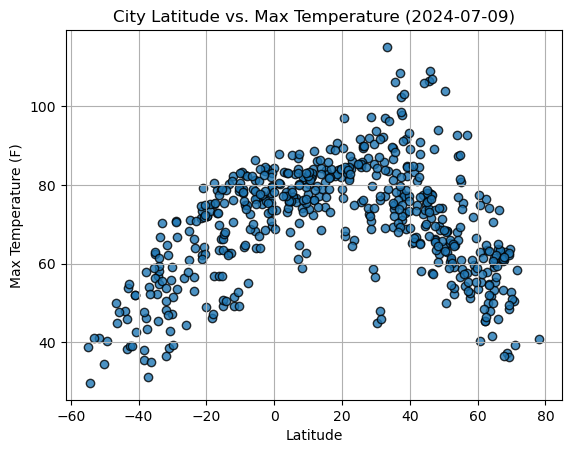

In [60]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

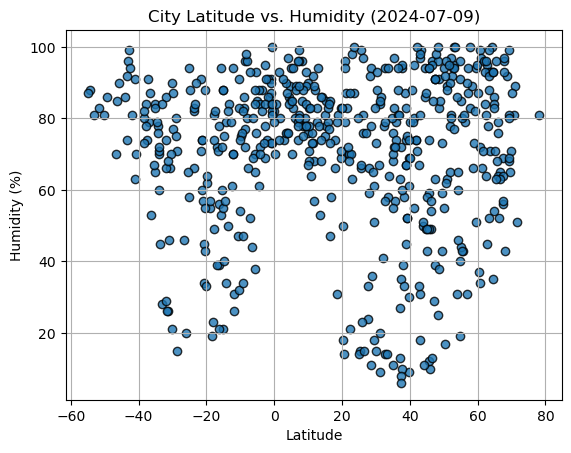

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

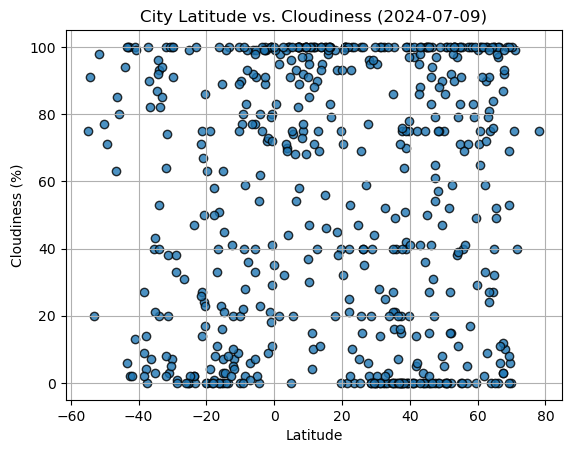

In [62]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

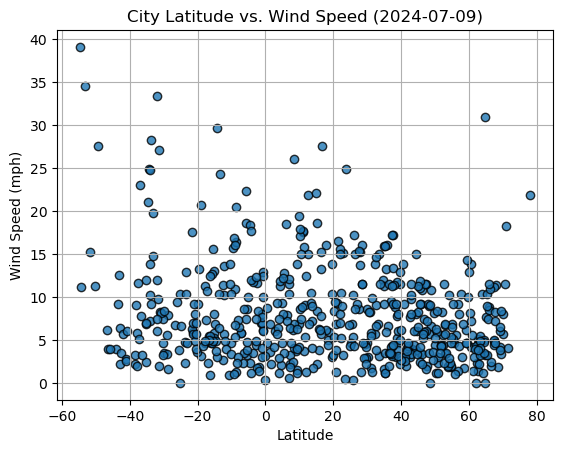

In [63]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,83.19,80,97,1.99,US,1720569655
2,susuman,62.7833,148.1667,63.48,45,9,5.12,RU,1720569656
3,barmer,25.7500,71.3833,84.47,66,20,5.30,IN,1720569657
6,talnakh,69.4865,88.3972,63.61,65,6,3.42,RU,1720569661
8,dakhla,23.6848,-15.9580,65.97,87,0,24.92,EH,1720569663


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,53.73,96,100,6.38,AU,1720569654
4,port-aux-francais,-49.3500,70.2167,40.30,86,71,27.56,TF,1720569658
5,palmas,-10.2128,-48.3603,80.47,54,0,4.61,BR,1720569504
7,papatowai,-46.5619,169.4708,49.95,70,63,6.11,NZ,1720569662
9,hermanus,-34.4187,19.2345,56.80,78,96,24.85,ZA,1720569664


###  Temperature vs. Latitude Linear Regression Plot

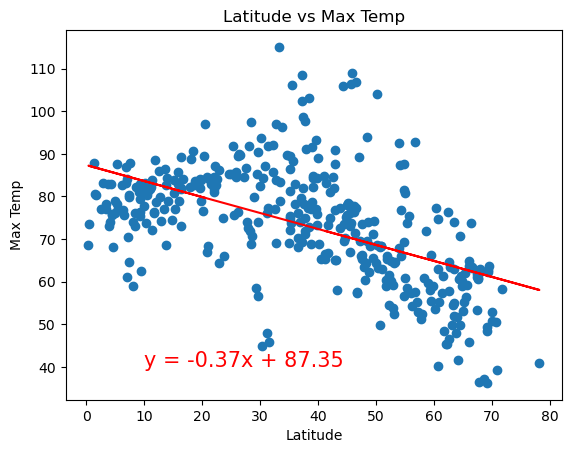

In [67]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude vs Max Temp", "Latitude", "Max Temp", (10, 40))


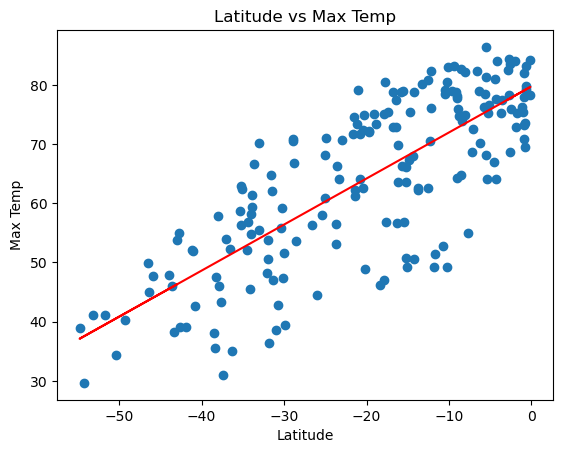

In [68]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude vs Max Temp", "Latitude", "Max Temp", (-50, 90))


# Discussion about the linear relationship:

### Northern Hemisphere
- **Slope**: Negative, indicating that as latitude increases, maximum temperature decreases.
- **R-squared value**: Approximately 0.39, showing a moderate correlation.

### Southern Hemisphere
- **Slope**: Negative, indicating that as latitude increases, maximum temperature decreases.
- **R-squared value**: Lower than the Northern Hemisphere, indicating a weaker correlation.
  

### Humidity vs. Latitude Linear Regression Plot

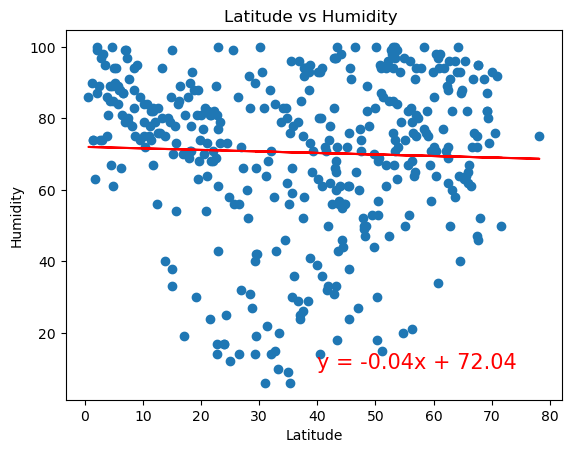

The r^2-value is: 0.001398477704697323


In [42]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude vs Humidity ", "Latitude", "Humidity", (40, 10))


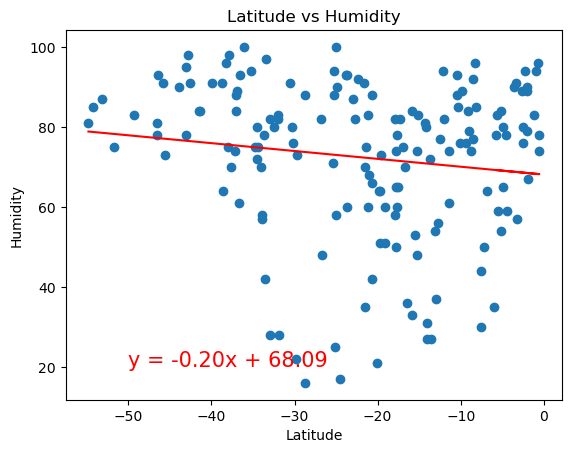

The r^2-value is: 0.01883832663226266


In [43]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude vs Humidity", "Latitude", "Humidity", (-50, 20))


# Discussion about the linear relationship:

### Northern Hemisphere
- **Slope**: The slope is positive, indicating that as latitude increases, humidity tends to increase slightly.
- **R-squared value**: The r-squared value quantifies the strength of the relationship. A value close to 0 suggests a weak linear relationship.

### Southern Hemisphere
- **Slope**: The slope is also positive, suggesting that as latitude increases, humidity tends to increase slightly.
- **R-squared value**: The r-squared value is lower than that of the Northern Hemisphere, indicating a weaker linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

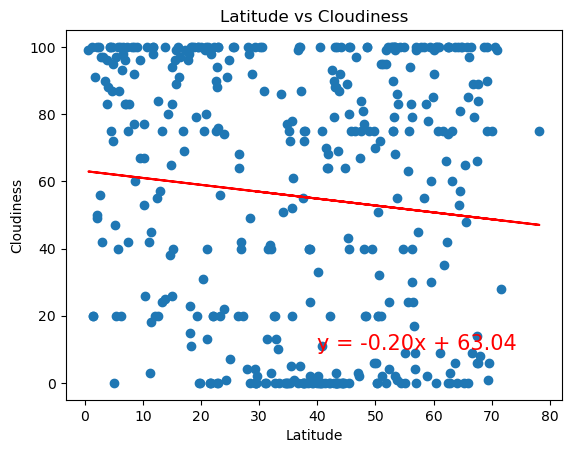

The r^2-value is: 0.010931144848207341


In [49]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"Latitude vs Cloudiness","Latitude", "Cloudiness", (40, 10))


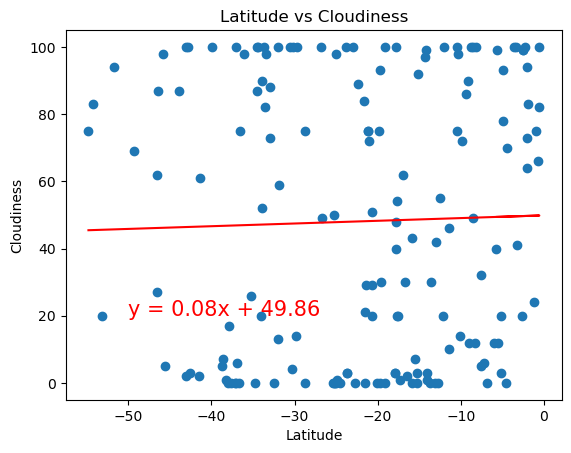

The r^2-value is: 0.0007733353887321083


In [50]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],"Latitude vs Cloudiness","Latitude", "Cloudiness", (-50, 20))

# Discussion about the linear relationship:

### Northern Hemisphere

- **Slope**: The slope is close to zero, indicating a very weak positive or negative correlation between latitude and cloudiness.
- **R-squared value**: The r-squared value is low, suggesting that latitude does not significantly explain the variation in cloudiness.

### Southern Hemisphere

- **Slope**: The slope is close to zero, similar to the Northern Hemisphere, indicating a very weak correlation between latitude and cloudiness.
- **R-squared value**: The r-squared value is also low, indicating that latitude is not a strong predictor of cloudiness in the Southern Hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

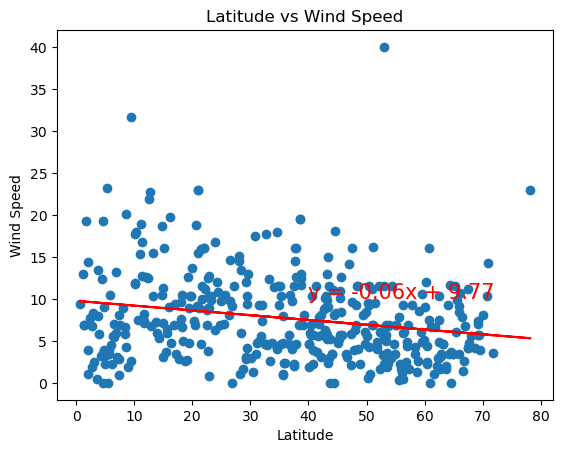

The r^2-value is: 0.04671230027116846


In [51]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"Latitude vs Wind Speed","Latitude", "Wind Speed", (40, 10))

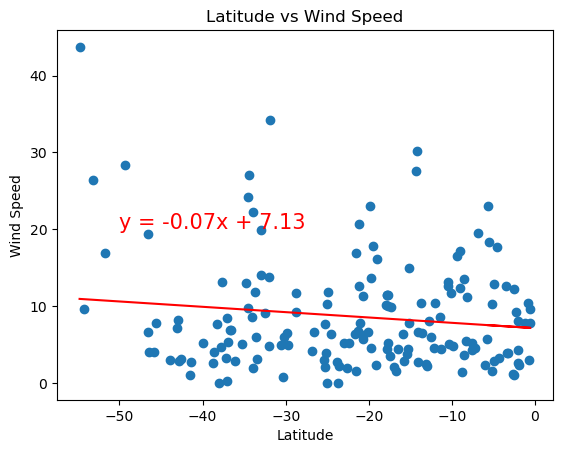

The r^2-value is: 0.017627874576821585


In [52]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],"Latitude vs Wind Speed","Latitude", "Wind Speed", (-50, 20))

# Discussion about the linear relationship:
### Northern Hemisphere

- **Slope**: The slope indicates a very slight increase in wind speed as latitude increases.
- **R-squared value**: The low r-squared value suggests that latitude alone does not explain much of the variation in wind speed.

### Southern Hemisphere

- **Slope**: Similarly, there is a very slight increase in wind speed with latitude in the Southern Hemisphere.
- **R-squared value**: The weak correlation implies that latitude has limited predictive power for wind speed variations in this hemisphere.